In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [3]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
from tensorflow.keras.utils import to_categorical

# Normalize the images to values between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

DNN MODEL

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.losses import SparseCategoricalCrossentropy

model = Sequential()

model.add(Input(shape=(28, 28)))
model.add(Flatten(input_shape=(28, 28)))

model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))

model.add(Dense(10, activation='linear'))

model.compile(optimizer='adam', loss=BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

y_pred_probs = model.predict(X_test)
y_pred_probs = tf.nn.softmax(y_pred_probs)

y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_pred_one_hot = to_categorical(y_pred_labels, num_classes=10)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8274 - loss: 0.1126 - val_accuracy: 0.9641 - val_loss: 0.0231
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9707 - loss: 0.0197 - val_accuracy: 0.9759 - val_loss: 0.0154
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9829 - loss: 0.0120 - val_accuracy: 0.9790 - val_loss: 0.0136
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9888 - loss: 0.0081 - val_accuracy: 0.9786 - val_loss: 0.0132
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9923 - loss: 0.0057 - val_accuracy: 0.9818 - val_loss: 0.0119
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9941 - loss: 0.0043 - val_accuracy: 0.9807 - val_loss: 0.0120
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9964 - loss: 0.0029 - val_accuracy: 0.9812 - val_loss: 0.0129
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9973 - loss: 0.0023 - val_accuracy: 0.

In [6]:
from sklearn.metrics import accuracy_score, f1_score

accuracy = accuracy_score(y_test, y_pred_one_hot)
print(f'Accuracy: {accuracy}')

f1_macro = f1_score(y_test, y_pred_one_hot, average='macro')
f1_micro = f1_score(y_test, y_pred_one_hot, average='micro')
f1_weighted = f1_score(y_test, y_pred_one_hot, average='weighted')
f1_samples = f1_score(y_test, y_pred_one_hot, average='samples')

print(f'F1 Macro: {f1_macro}')
print(f'F1 Micro: {f1_micro}')
print(f'F1 Weighted: {f1_weighted}')
print(f'F1 Samples: {f1_samples}')

Accuracy: 0.9837
F1 Macro: 0.9835879140938953
F1 Micro: 0.9837
F1 Weighted: 0.9836997017099444
F1 Samples: 0.9837


CNN MODEL

In [7]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [8]:
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [9]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='linear'))

model.compile(optimizer='adam', loss=BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

y_pred_probs = model.predict(X_test)
y_pred_probs = tf.nn.softmax(y_pred_probs)

y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_pred_one_hot = to_categorical(y_pred_labels, num_classes=10)

Epoch 1/10


469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 27ms/step - accuracy: 0.7517 - loss: 0.1542 - val_accuracy: 0.9793 - val_loss: 0.0158
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.9802 - loss: 0.0145 - val_accuracy: 0.9857 - val_loss: 0.0093
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9869 - loss: 0.0098 - val_accuracy: 0.9878 - val_loss: 0.0087
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9902 - loss: 0.0074 - val_accuracy: 0.9883 - val_loss: 0.0080
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9916 - loss: 0.0061 - val_accuracy: 0.9902 - val_loss: 0.0066
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9936 - loss: 0.0049 - val_accuracy: 0.9912 - val_loss: 0.0058
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9953 - loss: 0.0039 - val_accuracy: 0.9914 - val_loss: 0.0061
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9960 - loss: 0.0032 - val_accurac

In [10]:
from sklearn.metrics import accuracy_score, f1_score

accuracy = accuracy_score(y_test, y_pred_one_hot)
print(f'Accuracy: {accuracy}')

f1_macro = f1_score(y_test, y_pred_one_hot, average='macro')
f1_micro = f1_score(y_test, y_pred_one_hot, average='micro')
f1_weighted = f1_score(y_test, y_pred_one_hot, average='weighted')
f1_samples = f1_score(y_test, y_pred_one_hot, average='samples')

print(f'F1 Macro: {f1_macro}')
print(f'F1 Micro: {f1_micro}')
print(f'F1 Weighted: {f1_weighted}')
print(f'F1 Samples: {f1_samples}')

Accuracy: 0.9907
F1 Macro: 0.990580813434416
F1 Micro: 0.9907
F1 Weighted: 0.9907006061674223
F1 Samples: 0.9907


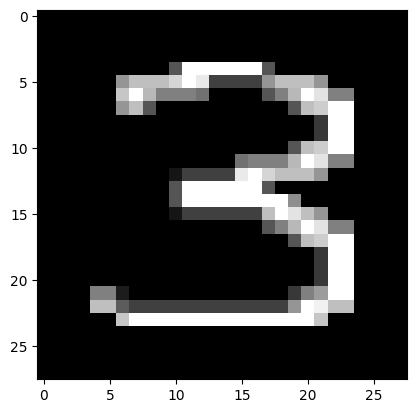

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted label: 3


In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import ipywidgets as widgets
from IPython.display import display

def preprocess_image(image_path):
    # Đọc ảnh từ đường dẫn
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Kiểm tra xem ảnh có được đọc thành công không
    if img is None:
        raise ValueError(f"Cannot read image from path: {image_path}")
    
    # Ngưỡng nhị phân ảnh
    _, img_thresh = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY_INV)
    
    # Tìm viền của ảnh
    contours, _ = cv2.findContours(img_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    if contours:
        # Lấy viền lớn nhất
        cnt = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(cnt)
        img_cropped = img_thresh[y:y+h, x:x+w]
    else:
        img_cropped = img_thresh  # Nếu không tìm thấy viền, giữ nguyên ảnh

    # Thay đổi kích thước ảnh về 20x20 pixel (giống kích thước trong MNIST)
    img_resized = cv2.resize(img_cropped, (20, 20), interpolation=cv2.INTER_AREA)
    
    # Tạo khung nền 28x28 và đặt ảnh vào giữa
    img_padded = np.zeros((28, 28), dtype=np.uint8) * 255  # Nền đen
    x_offset = (28 - 20) // 2
    y_offset = (28 - 20) // 2
    img_padded[y_offset:y_offset+20, x_offset:x_offset+20] = img_resized
    
    # Chuẩn hóa giá trị ảnh (MNIST có các giá trị pixel từ 0 đến 1)
    img_normalized = img_padded / 255.0
    
    return img_normalized

# Ví dụ sử dụng
image_path = 'So3.png' # Thay bằng đường dẫn tới ảnh chữ viết tay
processed_image = preprocess_image(image_path)

# Kiểm tra ảnh sau khi tiền xử lý
plt.imshow(processed_image, cmap='gray')
plt.show()

# Expand dimensions to match the input shape expected by the model
processed_image = np.expand_dims(processed_image, axis=0)  # Add batch dimension
processed_image = np.expand_dims(processed_image, axis=-1)  # Add channel dimension

# Predict the class of the input image using the CNN model
predicted_probs = model.predict(processed_image)
predicted_probs = tf.nn.softmax(predicted_probs)
predicted_label = np.argmax(predicted_probs, axis=1)

print(f'Predicted label: {predicted_label[0]}')